## **Multiple Linear Regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [3]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
dataset.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
# Add Target value also
df["Price"]=dataset.target

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

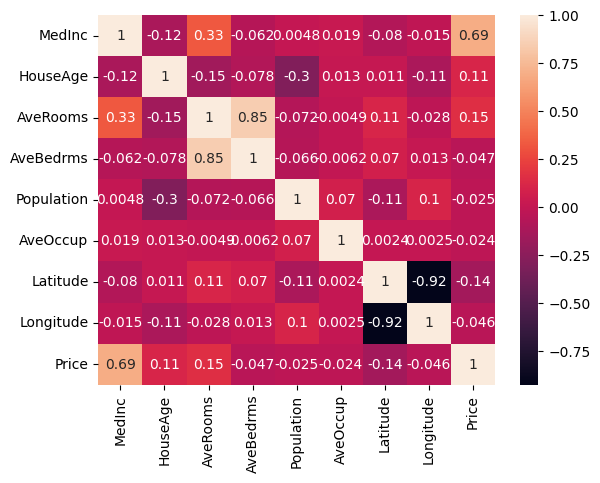

In [14]:
sns.heatmap(df.corr(), annot=True)

In [15]:
# Independent and Dependent Features
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [16]:
# Split the Dataset into Test and Train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [17]:
X_train.shape

(13828, 8)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.fit_transform(X_test)
X_test

array([[ 0.72001994, -1.33834012, -0.3808301 , ...,  0.05415325,
        -0.69097771,  0.19369097],
       [ 0.04168615, -0.1391224 , -0.32097575, ..., -0.06041412,
         0.90514586, -1.37333746],
       [ 0.32068539, -1.33834012, -0.39631158, ..., -0.0769786 ,
        -0.92168584,  0.89960474],
       ...,
       [ 0.34104424,  0.26061684,  0.03297221, ..., -0.04177659,
        -0.46968624, -0.44213206],
       [-0.90250711, -0.93860088,  0.62643804, ..., -0.05223908,
         2.53422773, -1.97912161],
       [-0.44157668,  1.21999102, -0.43265217, ...,  0.12609141,
        -0.74747766,  0.69433904]])

In [21]:
from sklearn.linear_model import LinearRegression
re = LinearRegression()

In [22]:
re.fit(X_train, y_train)

LinearRegression()

In [23]:
# Slope or coefficients
re.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [24]:
# Intercepts
re.intercept_

2.0634768086491184

In [25]:
# Prediction
y_pred = re.predict(X_test)
y_pred

array([2.99405341, 2.55774866, 2.32448171, ..., 3.09954263, 0.72304218,
       2.0398333 ])

In [30]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [31]:
mse, mae, rmse

(0.5445844745633521, 0.5372372970472844, 0.737959670011412)

In [36]:
# R Square and Adjusted R Square Error
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
r2_score

0.5992247966204969

In [37]:
# Adjusted R-square
1 - (1-r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5987535043043075

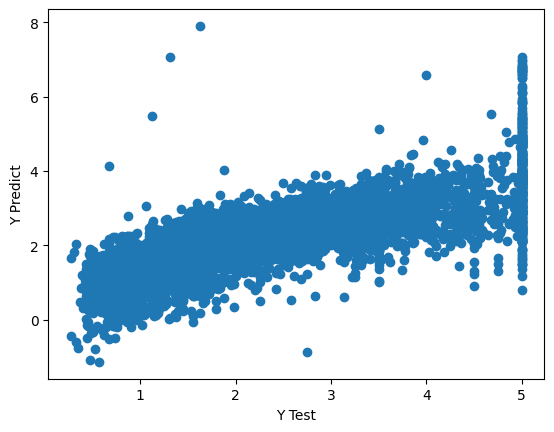

In [39]:
# Assumptions
plt.scatter(y_test, y_pred)
plt.xlabel("Y Test")
plt.ylabel("Y Predict")
plt.show()

In [40]:
residuals = y_test - y_pred
residuals

20303   -1.320053
16966    0.983251
10623   -0.722482
6146    -0.310236
2208    -0.646289
           ...   
13490   -0.237755
9340     0.518005
17439   -1.375543
2602     0.114958
7180    -0.622833
Name: Price, Length: 6812, dtype: float64

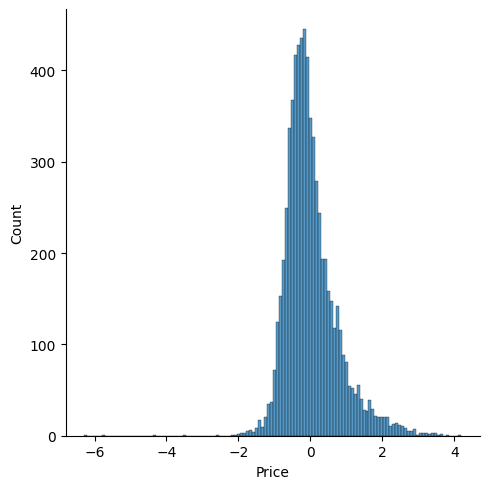

In [41]:
sns.displot(residuals)

Text(0, 0.5, 'Residuals')

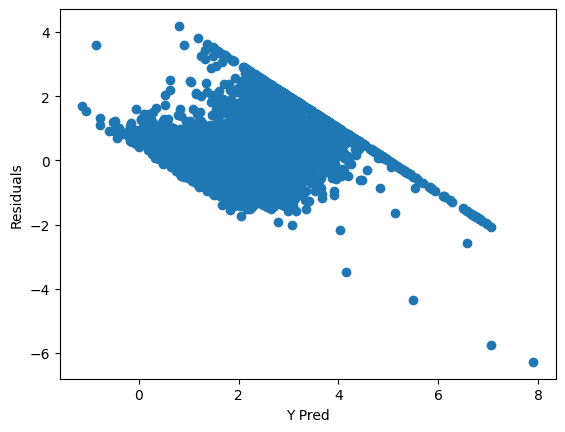

In [43]:
plt.scatter(y_pred, residuals)
plt.xlabel("Y Pred")
plt.ylabel("Residuals")

In [44]:
# Pickling
import pickle
pickle.dump(re, open('regressor.pkl', 'wb'))

In [45]:
# Load Pickle file
model = pickle.load(open('regressor.pkl', 'rb'))

In [46]:
model.predict(X_test)

array([2.99405341, 2.55774866, 2.32448171, ..., 3.09954263, 0.72304218,
       2.0398333 ])